In [35]:
import pandas as pd

# Load the dataset
file_path = "googl_data_2020_2025.csv"
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Info:")
print(df.info())

# Display the first few rows
df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1260 non-null   object
 1   Adj Close  1259 non-null   object
 2   Close      1259 non-null   object
 3   High       1259 non-null   object
 4   Low        1259 non-null   object
 5   Open       1259 non-null   object
 6   Volume     1259 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB
None


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000


In [36]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop rows with missing values (or you can fill with mean/median)
df.dropna(inplace=True)

# Convert necessary columns to numeric (if needed)
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except:
        pass

# Display updated info
df.info()



Missing Values:
 Price        0
Adj Close    1
Close        1
High         1
Low          1
Open         1
Volume       1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      0 non-null      float64
 1   Adj Close  1258 non-null   float64
 2   Close      1258 non-null   float64
 3   High       1258 non-null   float64
 4   Low        1258 non-null   float64
 5   Open       1258 non-null   float64
 6   Volume     1258 non-null   float64
dtypes: float64(7)
memory usage: 78.7 KB


In [37]:

# df.drop(columns=['Price'])

# df.isnull().sum()


# Drop 'Price' column
df.drop(columns=['Price'], inplace=True)
df.fillna(df.mean(), inplace=True)
# Confirm changes
print(df.isnull().sum())  # Should print all zeros


Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [38]:
print("Dataset Columns:", df.columns.tolist())


Dataset Columns: ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']


In [39]:
# Set target column (y) as 'Close' price
target_column = "Close"

# Select features (X) by removing the target column
X = df.drop(columns=[target_column])  
y = df[target_column]  

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1007, 5), (252, 5), (1007,), (252,))

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Train Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Make predictions
y_pred_lin = lin_model.predict(X_test)

# Evaluate Linear Regression
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)

print(f"Linear Regression - R²: {r2_lin:.4f}, MSE: {mse_lin:.4f}, MAE: {mae_lin:.4f}")


Linear Regression - R²: 1.0000, MSE: 0.0123, MAE: 0.0708


In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Train Polynomial Regression model (degree 2)
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test)

# Evaluate Polynomial Regression
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print(f"Polynomial Regression - R²: {r2_poly:.4f}, MSE: {mse_poly:.4f}, MAE: {mae_poly:.4f}")


Polynomial Regression - R²: 0.9822, MSE: 19.3890, MAE: 3.0836


In [43]:
from sklearn.neighbors import KNeighborsRegressor

# Train KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN Regression - R²: {r2_knn:.4f}")


KNN Regression - R²: -0.0529


In [44]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree Regression
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Regression - R²: {r2_dt:.4f}")


Decision Tree Regression - R²: 0.9998


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Regression
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regression - R²: {r2_rf:.4f}")


Random Forest Regression - R²: 0.9999


In [46]:
from sklearn.svm import SVR

# Train SVM model
svm_model = SVR(kernel="rbf")
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM Regression
r2_svm = r2_score(y_test, y_pred_svm)
print(f"SVM Regression - R²: {r2_svm:.4f}")


SVM Regression - R²: 0.0951


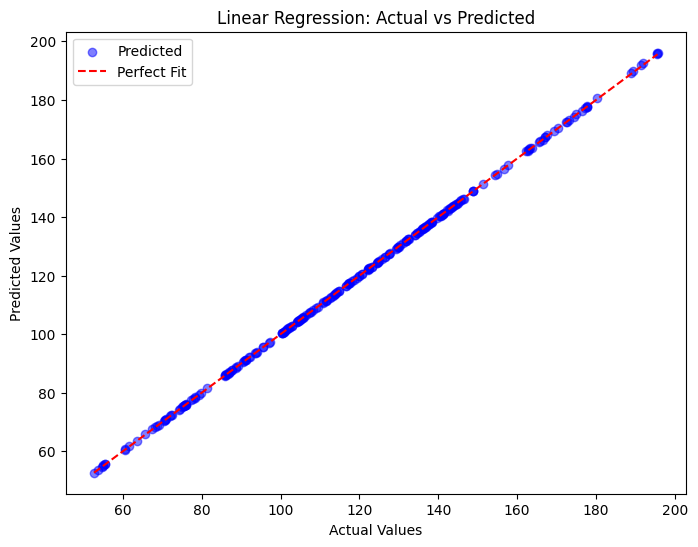

In [47]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted for Linear Regression
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lin, color="blue", alpha=0.5, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()
